In [1]:
%matplotlib inline
#%matplotlib widget

In [2]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import matplotlib.colors as colors
import os
from ipywidgets import HBox, Textarea, interact

In [3]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
#def expShift(t,A,tau,k):
#    return A*np.exp(-t/tau)+k
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
def powerlaw(x,A,n):
    return A*x**n
def linear_fit_log(x,n,A):
    return n*x+A
    

In [12]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack21.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
all_linked_data_filename='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\all_linking_passive_data_21bots.csv'
all_linked_data=pd.read_csv(all_linked_data_filename,index_col=0)
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged'
delta_t=1 #seconds
velocity_data=pd.DataFrame()
for index,row in expSumPassive.iterrows():
    FileName=row.linkingFileNamePack
    print(FileName)
    data=all_linked_data[(all_linked_data['Filename']==FileName)]
    data=data.iloc[:,0:4]
    raw_diff=data.diff(periods=25*delta_t)
    delta_r=np.sqrt(np.power(raw_diff.x,2)+np.power(raw_diff.y,2))
    row_data=pd.DataFrame()
    row_data['FileName']=[FileName]*len(delta_r)
    row_data['Bot_Type']=[row.bottype]*len(delta_r)
    row_data['diameter']=[row['passiveDiameter[cm]']]*len(delta_r)
    delta_time=[delta_t]*len(delta_r)
    row_data['delta_V(per_1sec)']=delta_r/delta_time
    velocity_data=pd.concat([velocity_data,row_data],axis=0,ignore_index=True)
print(velocity_data)
velocity_data.to_csv(passive_path+'\\data_velocity(per_1sec)_histogram_21_bots.csv')

aligner_N021_D007_C0548.MP4_link.csv
aligner_N021_D007_C0547.MP4_link.csv
aligner_N021_D007_C0544.MP4_link.csv
aligner_N021_D007_C0542.MP4_link.csv
fronter_N021_D007_C0541.MP4_link.csv
fronter_N021_D007_C0540.MP4_link.csv
fronter_N021_D007_C0539.MP4_link.csv
fronter_N021_D007_C0538.MP4_link.csv
fronter_N021_D012_C0537.MP4_link.csv
fronter_N021_D012_C0536.MP4_link.csv
fronter_N021_D012_C0535.MP4_link.csv
fronter_N021_D012_C0534.MP4_link.csv
fronter_N021_D012_C0533.MP4_link.csv
aligner_N021_D012_C0532.MP4_link.csv
aligner_N021_D012_C0531.MP4_link.csv
aligner_N021_D012_C0530.MP4_link.csv
aligner_N021_D012_C0529.MP4_link.csv
aligner_N021_D018_C0527.MP4_link.csv
aligner_N021_D018_C0526.MP4_link.csv
aligner_N021_D018_C0525.MP4_link.csv
aligner_N021_D018_C0523.MP4_link.csv
fronter_N021_D018_C0521.MP4_link.csv
fronter_N021_D018_C0519.MP4_link.csv
fronter_N021_D018_C0514.MP4_link.csv
fronter_N021_D018_C0516.MP4_link.csv
fronter_N021_D018_C0517.MP4_link.csv
fronter_N021_D028_C0490.MP4_link.csv
f

872033         NaN
872034         NaN
872035         NaN
872036         NaN
872037         NaN
            ...   
995204    2.000000
995205    1.000000
995206    1.000000
995207    1.000000
995208    1.414214
Name: delta_V(per_1sec), Length: 123176, dtype: float64


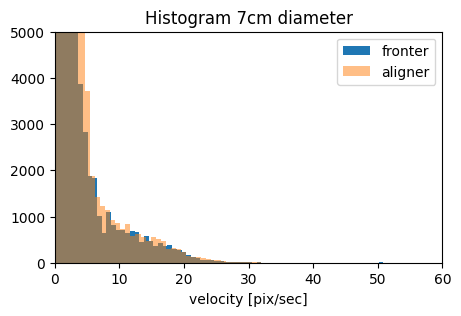

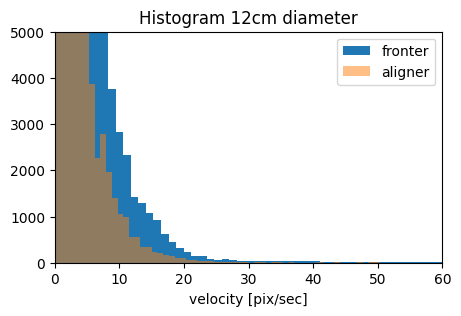

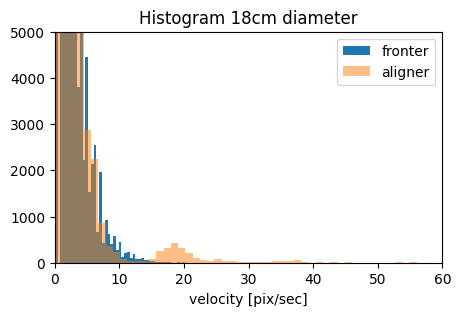

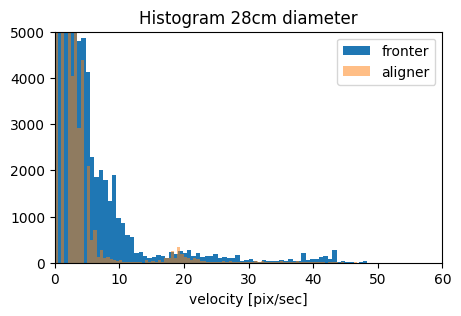

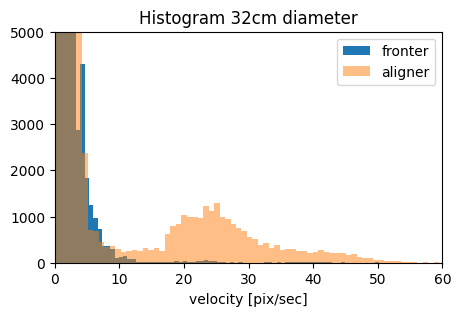

In [27]:
bottypes=['fronter','aligner']
diameters=[7,12,18,28,32]
#fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
#plt.subplots_adjust(hspace=0.5)
#fig.suptitle("velocity histograms", fontsize=18, y=0.95)
for diameter in diameters:
    fig, ax = plt.subplots(1,1, figsize=(5, 3))
    for bottype in bottypes:
        relevant_data=velocity_data[((velocity_data['Bot_Type']==bottype)&(velocity_data['diameter']==diameter))] 
        relevant_data=relevant_data['delta_V(per_1sec)']
        if bottype=='aligner':
            ax.hist(relevant_data,bins=100,label=bottype,alpha=0.5)
        else:
             ax.hist(relevant_data,bins=100,label=bottype)
    ax.set_title("Histogram {}cm diameter".format(diameter))
    ax.legend()
    ax.axis([0,60,0,5000])
    ax.set_xlabel("velocity [pix/sec]")